<a href="https://colab.research.google.com/github/Moran-360/Teoria_de_aprendizaje_de_maquina/blob/main/Parciales/Parcial1_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: TeorÍa de Aprendizaje de Máquina- 2025-I

# Instalación de librerías necesarias

In [12]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.8 MB/s eta 0:00:00


# Importación de librerías

In [1]:
# Instalamos las librerías necesarias si no están ya instaladas
!pip install scikit-learn pandas numpy matplotlib seaborn xgboost optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 11.3 MB/s eta 0:00:00


# Carga del dataset

In [2]:
# Importación de librerías para análisis, modelos y visualización
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

import optuna

# Configuraciones para visualización
sns.set(style="whitegrid")


In [23]:
# Carga del dataset desde desde un archivo .csv local

data = pd.read_csv('/content/sample_data/AmesHousing.csv')


# Exploración de datos

In [22]:
# Mostrar las primeras filas del conjunto de datos
data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [24]:
# Información general de columnas, tipos de datos y valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [25]:
# Estadísticas descriptivas
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [26]:
# Conteo de valores nulos por columna
data.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


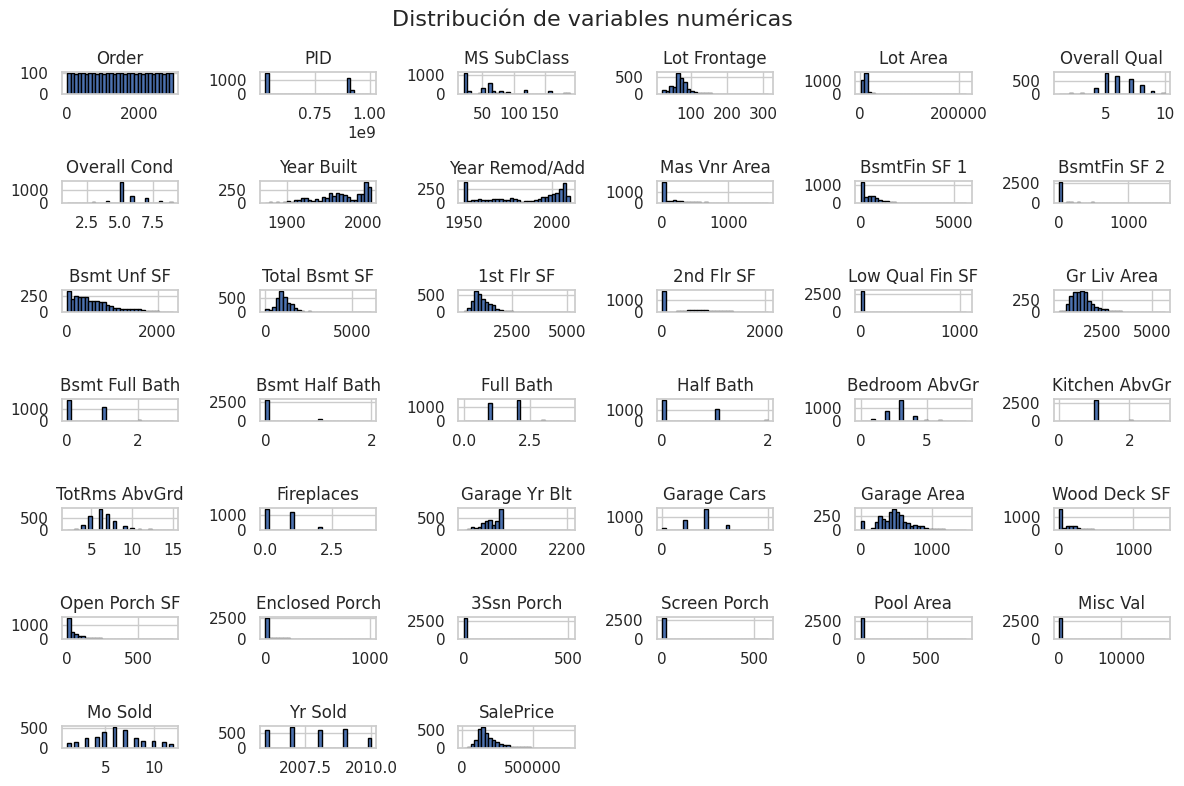

In [27]:
#Distribución de las variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma general
data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()



Matriz de correlación:


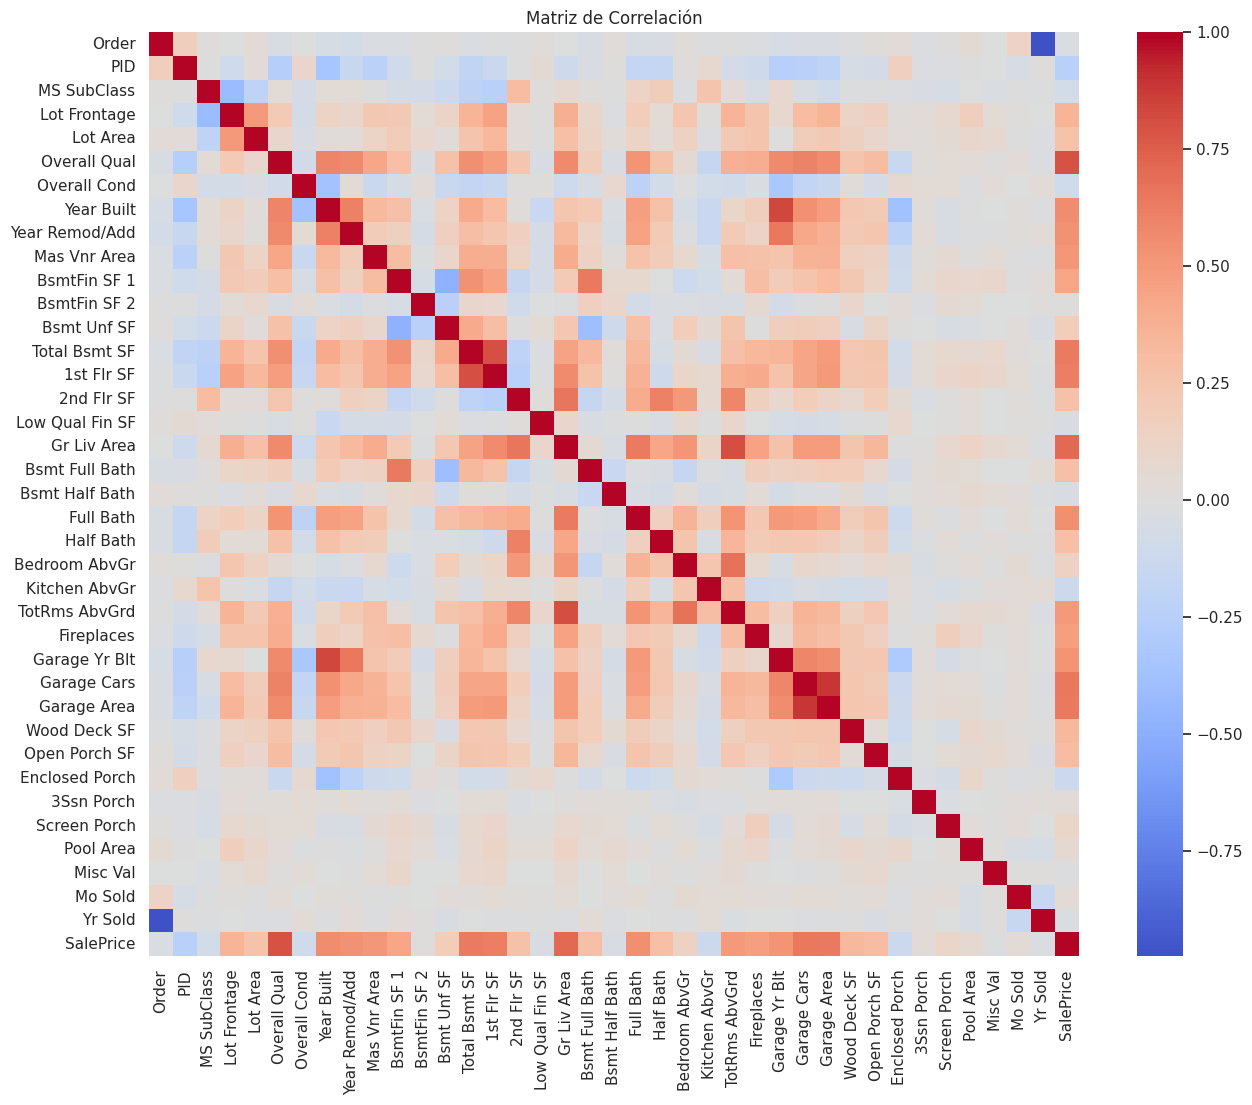

In [34]:
# Matriz de correlación
def plot_correlation_matrix(data):
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    plt.figure(figsize=(15, 12))
    corr = data[numerical_cols].corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
    plt.title("Matriz de Correlación")
    plt.show()
print("\nMatriz de correlación:")
plot_correlation_matrix(data)

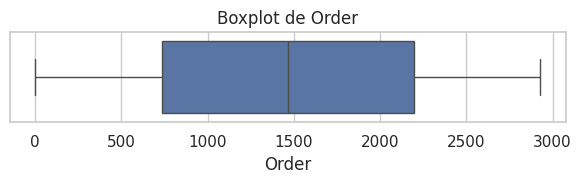

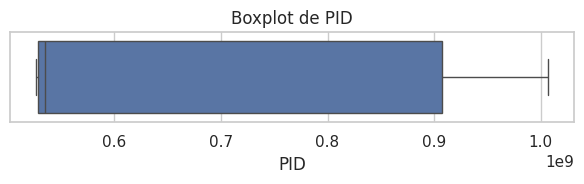

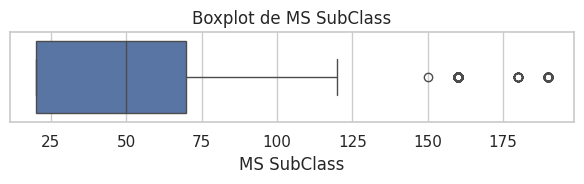

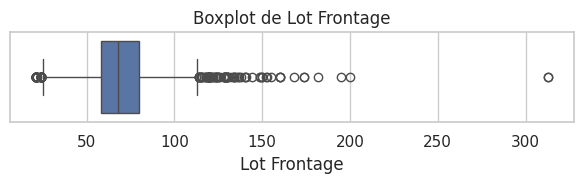

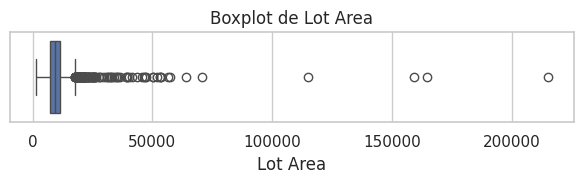

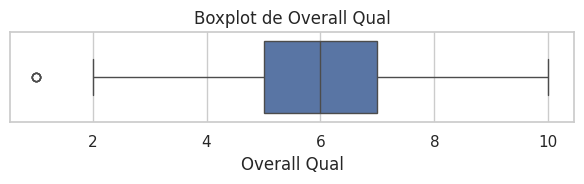

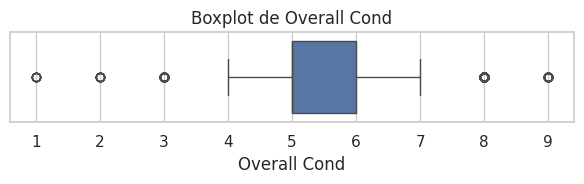

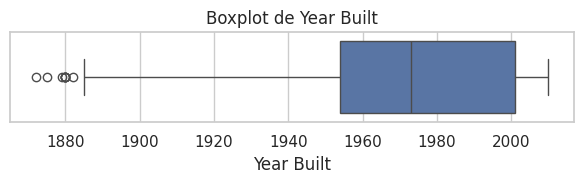

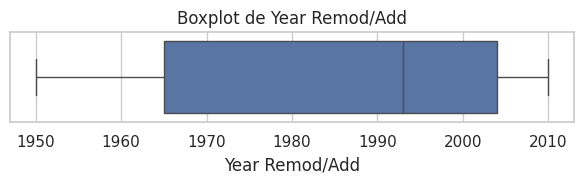

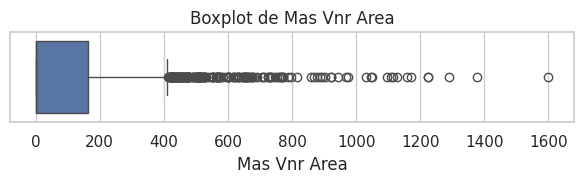

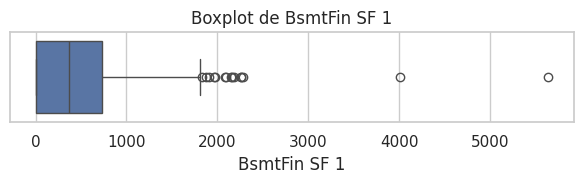

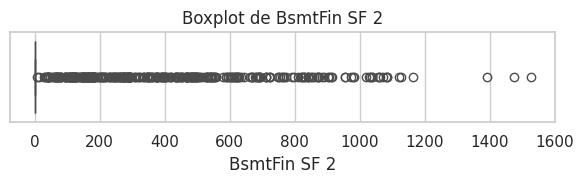

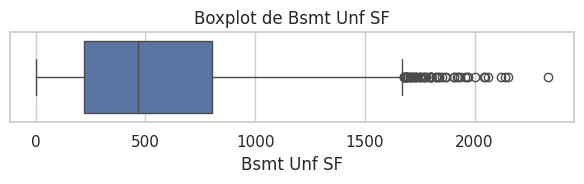

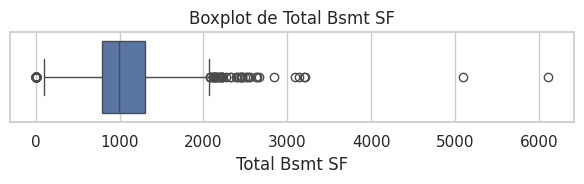

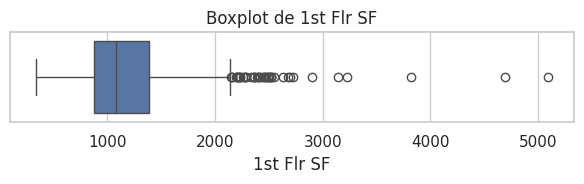

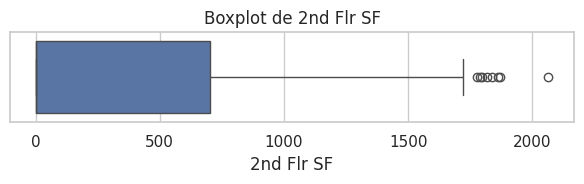

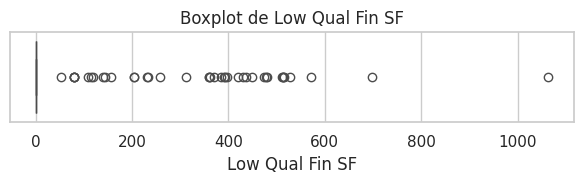

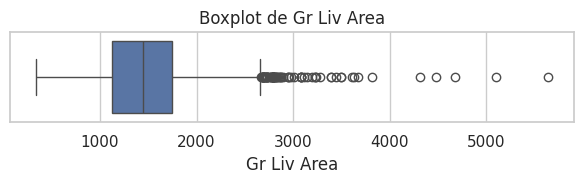

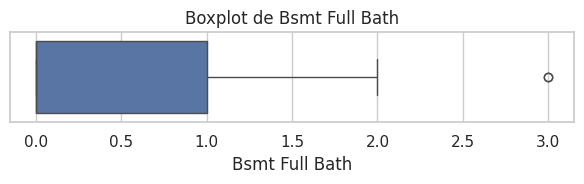

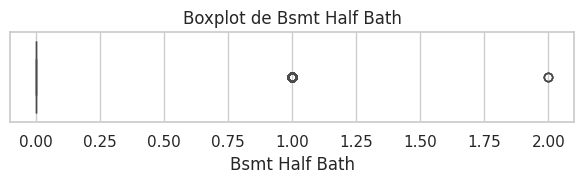

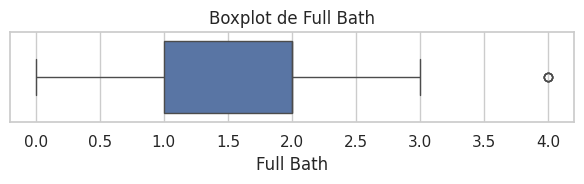

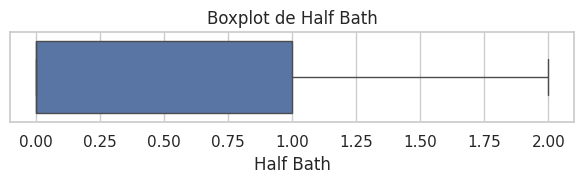

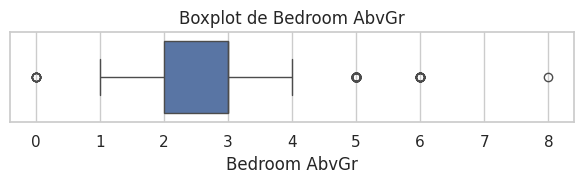

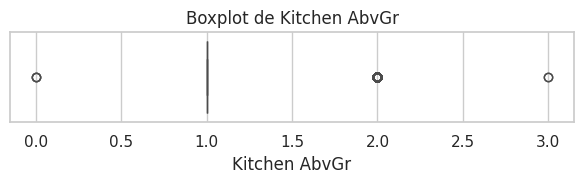

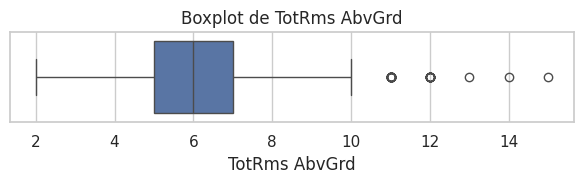

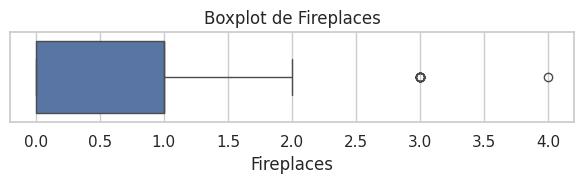

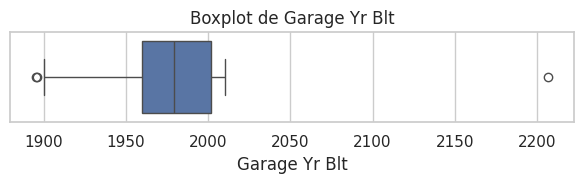

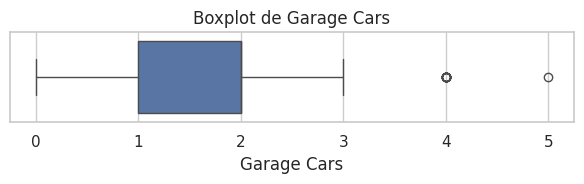

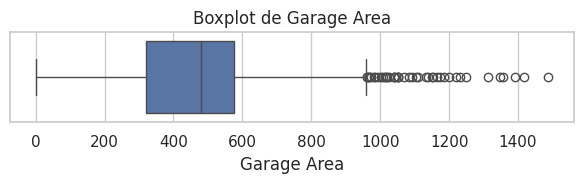

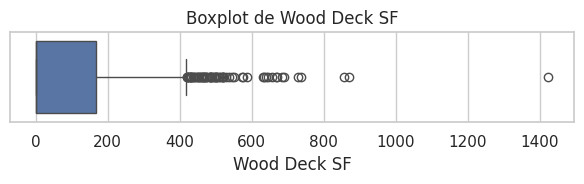

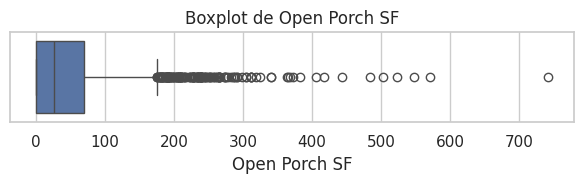

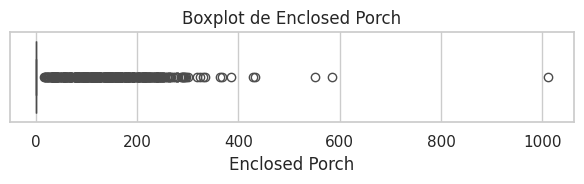

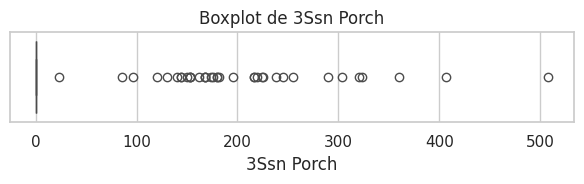

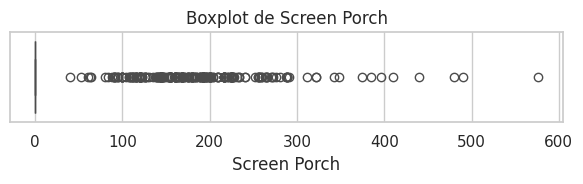

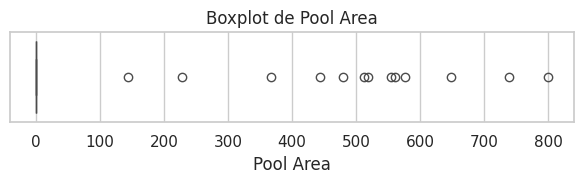

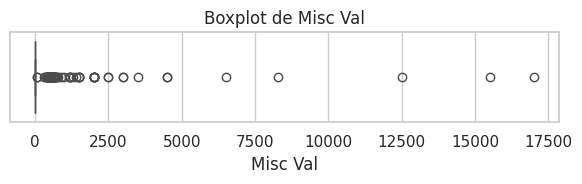

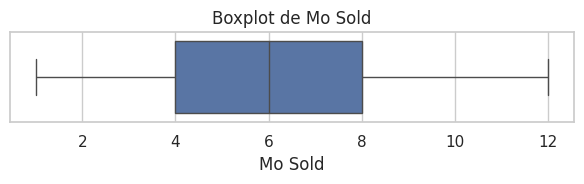

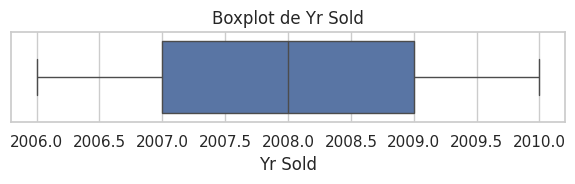

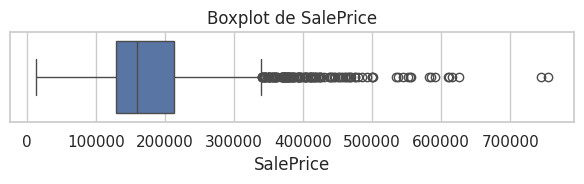

In [35]:
# Boxplots para detectar outliers
for col in data.select_dtypes(include="number").columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

# Preprocesamiento automático de los datos

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Eliminamos columnas con más del 40% de valores faltantes y otras irrelevantes
threshold = len(data) * 0.4
data = data.dropna(thresh=threshold, axis=1)
data = data.drop(['Order', 'PID'], axis=1, errors='ignore')  # Columnas no útiles

# Separamos características y variable objetivo
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

# Identificamos variables numéricas y categóricas
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Pipeline para columnas numéricas: imputación + escalado
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline para columnas categóricas: imputación + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combinamos transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


# División del conjunto de datos y esquema de validación

In [7]:
# Dividimos los datos en entrenamiento y prueba (aunque usaremos cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Esquema de validación cruzada: 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)


# Modelo 1 - LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression

# Creamos un pipeline con el preprocesamiento y el modelo
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Definimos las métricas personalizadas para evaluar
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(model, X, y, cv):
    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_error")
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error")
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring="r2")

    mape_scores = []
    for train_idx, val_idx in cv.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        preds = model.predict(X.iloc[val_idx])
        mape_scores.append(mape(y.iloc[val_idx], preds))

    print("Linear Regression - Resultados promedio (5 folds):")
    print(f"MAE:  {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
    print(f"MSE:  {mse_scores.mean():.2f} ± {mse_scores.std():.2f}")
    print(f"R2:   {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print(f"MAPE: {np.mean(mape_scores):.2f} ± {np.std(mape_scores):.2f}")

# Evaluamos el modelo
evaluate_model(lr_pipeline, X_train, y_train, cv)


Linear Regression - Resultados promedio (5 folds):
MAE:  16830.48 ± 1326.98
MSE:  1001627004.89 ± 663461818.41
R2:   0.8311 ± 0.1099
MAPE: 10.62 ± 1.22


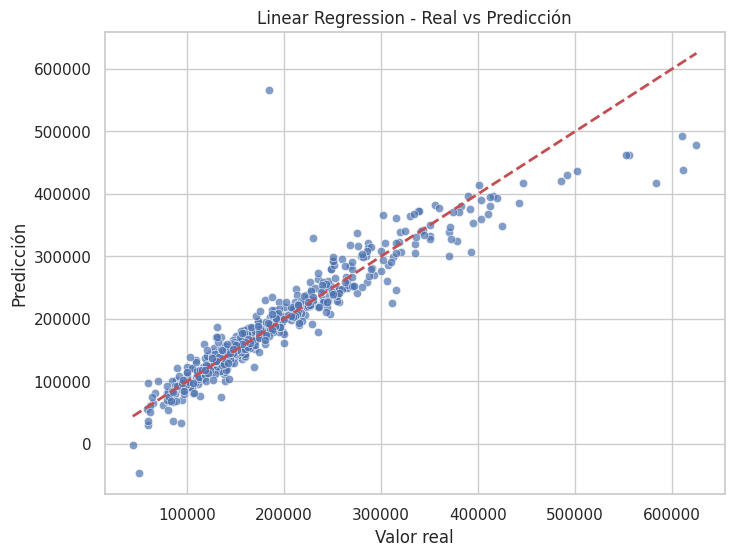

In [37]:
def plot_predictions(model, X_train, X_test, y_train, y_test, title="Predicción vs Real"):
    # Entrenamos el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Gráfico de dispersión: real vs predicción
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Valor real")
    plt.ylabel("Predicción")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Entrenamiento con 80% y prueba con 20% para graficar
plot_predictions(lr_pipeline, X_train, X_test, y_train, y_test, "Linear Regression - Real vs Predicción")


# Modelo 2 - Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real

# Pipeline base para Lasso
def get_lasso_pipeline():
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", Lasso(max_iter=10000))
    ])

# Espacio de búsqueda común
param_grid = {"regressor__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
param_dist = {"regressor__alpha": np.logspace(-5, 1, 100)}
param_bayes = {"regressor__alpha": Real(1e-5, 10, prior='log-uniform')}


**Búsqueda con GridSearchCV**

🔷 GridSearchCV - Mejor alpha: {'regressor__alpha': 10}
Linear Regression - Resultados promedio (5 folds):
MAE:  16297.61 ± 1177.29
MSE:  949988380.72 ± 631426870.16
R2:   0.8399 ± 0.1044
MAPE: 10.11 ± 1.06


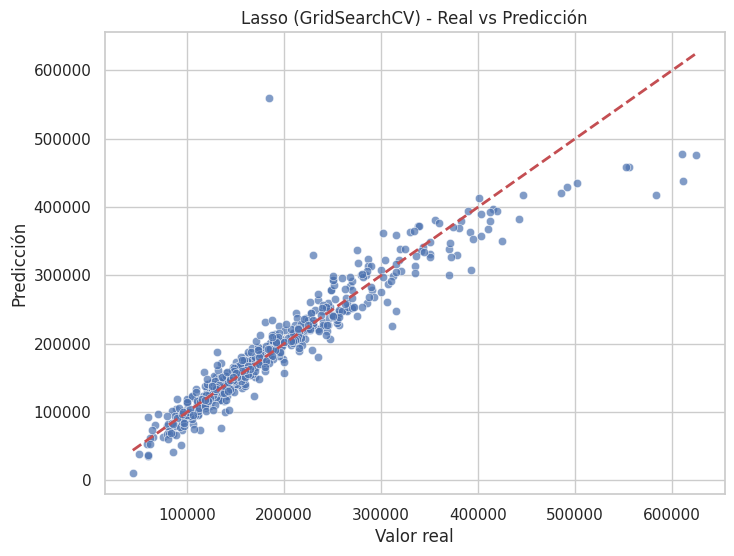

In [14]:
# GridSearchCV
lasso_grid = GridSearchCV(
    estimator=get_lasso_pipeline(),
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
lasso_grid.fit(X_train, y_train)

best_lasso_grid = lasso_grid.best_estimator_
print("🔷 GridSearchCV - Mejor alpha:", lasso_grid.best_params_)
evaluate_model(best_lasso_grid, X_train, y_train, cv)
plot_predictions(best_lasso_grid, X_train, X_test, y_train, y_test, "Lasso (GridSearchCV) - Real vs Predicción")


**Búsqueda con RandomizedSearchCV**

🔸 RandomizedSearchCV - Mejor alpha: {'regressor__alpha': np.float64(1.072267222010323)}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5055279665.420288, tolerance: 1082582224.7810018
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5055279665.420288, tolerance: 1082582224.7810018
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5055279665.420288, tolerance: 1082582224.7810018
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: Conve

Linear Regression - Resultados promedio (5 folds):
MAE:  16684.65 ± 1300.57
MSE:  979648475.23 ± 641255496.70
R2:   0.8348 ± 0.1062
MAPE: 10.52 ± 1.21


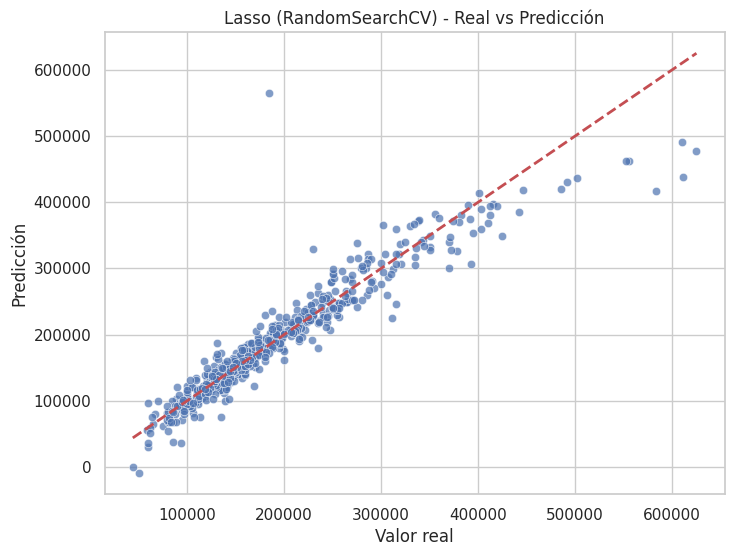

In [16]:
from scipy.stats import loguniform

# RandomizedSearchCV
lasso_random = RandomizedSearchCV(
    estimator=get_lasso_pipeline(),
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
lasso_random.fit(X_train, y_train)

best_lasso_random = lasso_random.best_estimator_
print("🔸 RandomizedSearchCV - Mejor alpha:", lasso_random.best_params_)
evaluate_model(best_lasso_random, X_train, y_train, cv)
plot_predictions(best_lasso_random, X_train, X_test, y_train, y_test, "Lasso (RandomSearchCV) - Real vs Predicción")


**Búsqueda con Optimización Bayesiana (BayesSearchCV)**

🔶 BayesSearchCV - Mejor alpha: OrderedDict([('regressor__alpha', 5.405898881406362)])
Linear Regression - Resultados promedio (5 folds):
MAE:  16430.54 ± 1212.38
MSE:  959442051.18 ± 634281343.96
R2:   0.8382 ± 0.1050
MAPE: 10.26 ± 1.10


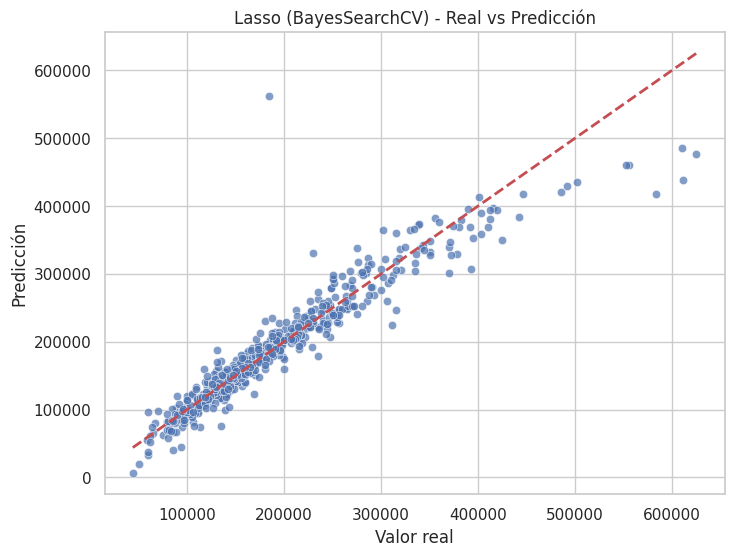

In [17]:
# BayesSearchCV
lasso_bayes = BayesSearchCV(
    estimator=get_lasso_pipeline(),
    search_spaces=param_bayes,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
lasso_bayes.fit(X_train, y_train)

best_lasso_bayes = lasso_bayes.best_estimator_
print("🔶 BayesSearchCV - Mejor alpha:", lasso_bayes.best_params_)
evaluate_model(best_lasso_bayes, X_train, y_train, cv)
plot_predictions(best_lasso_bayes, X_train, X_test, y_train, y_test, "Lasso (BayesSearchCV) - Real vs Predicción")


# Modelo 3 - ElasticNet

In [18]:
from sklearn.linear_model import ElasticNet
from skopt.space import Real

# Función para crear el pipeline de ElasticNet
def get_elasticnet_pipeline():
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", ElasticNet(max_iter=10000))
    ])

# Espacios de búsqueda
param_grid_elastic = {
    "regressor__alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "regressor__l1_ratio": [0.1, 0.3, 0.5, 0.7, 1.0]
}

param_dist_elastic = {
    "regressor__alpha": np.logspace(-5, 1, 100),
    "regressor__l1_ratio": np.linspace(0, 1, 100)
}

param_bayes_elastic = {
    "regressor__alpha": Real(1e-5, 10, prior='log-uniform'),
    "regressor__l1_ratio": Real(0.0, 1.0)
}


**GridSearchCV para ElasticNet**

🔷 GridSearchCV - Mejores parámetros: {'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.1}
Linear Regression - Resultados promedio (5 folds):
MAE:  16688.47 ± 1060.92
MSE:  959370114.89 ± 643880095.96
R2:   0.8390 ± 0.1059
MAPE: 10.31 ± 0.86


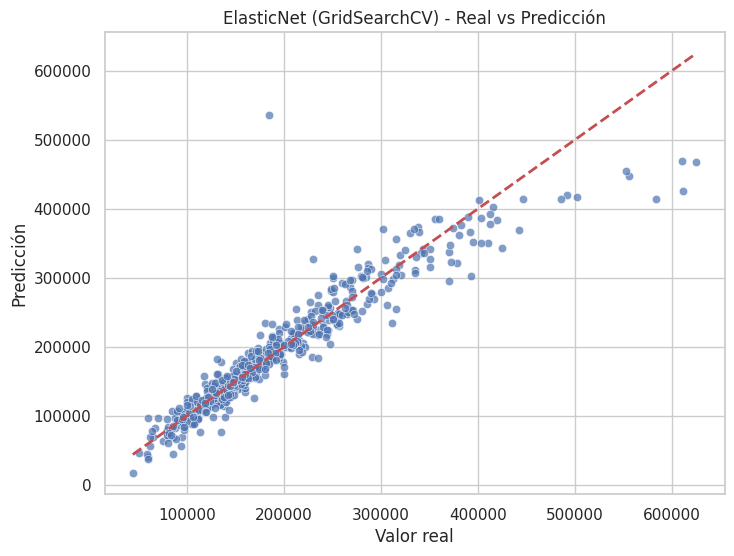

In [19]:
elastic_grid = GridSearchCV(
    estimator=get_elasticnet_pipeline(),
    param_grid=param_grid_elastic,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
elastic_grid.fit(X_train, y_train)

best_elastic_grid = elastic_grid.best_estimator_
print("🔷 GridSearchCV - Mejores parámetros:", elastic_grid.best_params_)
evaluate_model(best_elastic_grid, X_train, y_train, cv)
plot_predictions(best_elastic_grid, X_train, X_test, y_train, y_test, "ElasticNet (GridSearchCV) - Real vs Predicción")


**RandomizedSearchCV para ElasticNet**

🔸 RandomizedSearchCV - Mejores parámetros: {'regressor__l1_ratio': np.float64(0.9191919191919192), 'regressor__alpha': np.float64(0.012328467394420659)}
Linear Regression - Resultados promedio (5 folds):
MAE:  16686.16 ± 1054.61
MSE:  959384001.71 ± 643937681.89
R2:   0.8390 ± 0.1059
MAPE: 10.30 ± 0.86


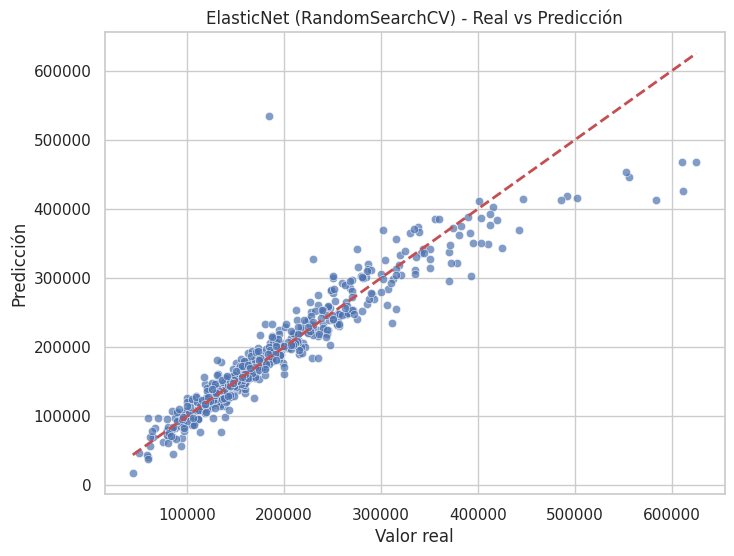

In [20]:
elastic_random = RandomizedSearchCV(
    estimator=get_elasticnet_pipeline(),
    param_distributions=param_dist_elastic,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
elastic_random.fit(X_train, y_train)

best_elastic_random = elastic_random.best_estimator_
print("🔸 RandomizedSearchCV - Mejores parámetros:", elastic_random.best_params_)
evaluate_model(best_elastic_random, X_train, y_train, cv)
plot_predictions(best_elastic_random, X_train, X_test, y_train, y_test, "ElasticNet (RandomSearchCV) - Real vs Predicción")


**BayesSearchCV para ElasticNet**

🔶 BayesSearchCV - Mejores parámetros: OrderedDict([('regressor__alpha', 0.0028881766539144717), ('regressor__l1_ratio', 0.7277257431773251)])
Linear Regression - Resultados promedio (5 folds):
MAE:  16690.03 ± 1069.76
MSE:  959359757.92 ± 643925301.55
R2:   0.8390 ± 0.1059
MAPE: 10.32 ± 0.87


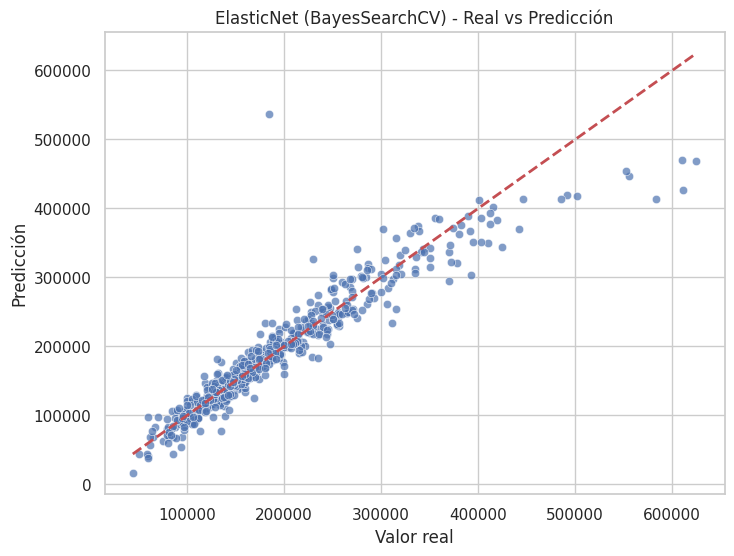

In [21]:
from skopt import BayesSearchCV

elastic_bayes = BayesSearchCV(
    estimator=get_elasticnet_pipeline(),
    search_spaces=param_bayes_elastic,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
elastic_bayes.fit(X_train, y_train)

best_elastic_bayes = elastic_bayes.best_estimator_
print("🔶 BayesSearchCV - Mejores parámetros:", elastic_bayes.best_params_)
evaluate_model(best_elastic_bayes, X_train, y_train, cv)
plot_predictions(best_elastic_bayes, X_train, X_test, y_train, y_test, "ElasticNet (BayesSearchCV) - Real vs Predicción")


# Modelo 4 - KernelRidge

In [38]:
from sklearn.kernel_ridge import KernelRidge
from skopt.space import Real, Categorical

# Pipeline base para Kernel Ridge
def get_krr_pipeline():
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", KernelRidge(kernel="rbf"))
    ])

# Espacios de búsqueda
param_grid_krr = {
    "regressor__alpha": [0.01, 0.1, 1, 10],
    "regressor__gamma": [0.01, 0.1, 1, 10]
}

param_dist_krr = {
    "regressor__alpha": np.logspace(-2, 2, 50),
    "regressor__gamma": np.logspace(-2, 2, 50)
}

param_bayes_krr = {
    "regressor__alpha": Real(1e-2, 100, prior='log-uniform'),
    "regressor__gamma": Real(1e-2, 100, prior='log-uniform')
}


**Kernel Ridge con GridSearchCV**

🔷 GridSearchCV - Mejores parámetros: {'regressor__alpha': 0.01, 'regressor__gamma': 0.01}
Linear Regression - Resultados promedio (5 folds):
MAE:  16436.24 ± 973.92
MSE:  976529028.99 ± 309287055.73
R2:   0.8365 ± 0.0498
MAPE: 9.61 ± 0.79


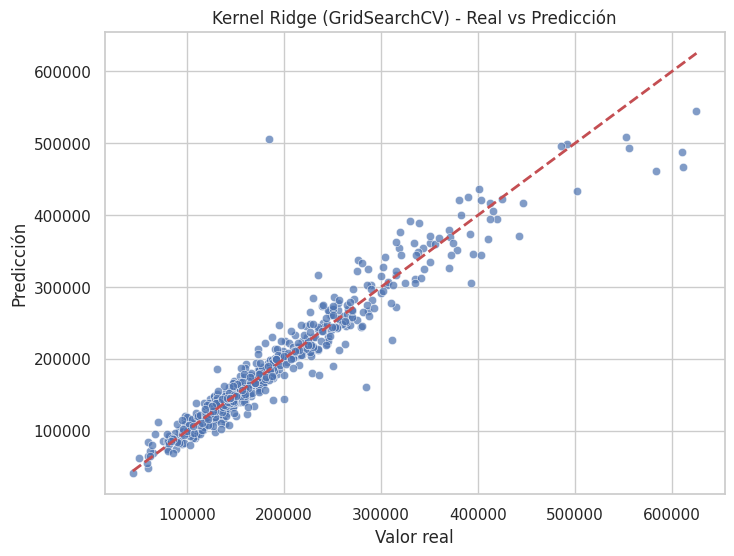

In [39]:
krr_grid = GridSearchCV(
    estimator=get_krr_pipeline(),
    param_grid=param_grid_krr,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
krr_grid.fit(X_train, y_train)

best_krr_grid = krr_grid.best_estimator_
print("🔷 GridSearchCV - Mejores parámetros:", krr_grid.best_params_)
evaluate_model(best_krr_grid, X_train, y_train, cv)
plot_predictions(best_krr_grid, X_train, X_test, y_train, y_test, "Kernel Ridge (GridSearchCV) - Real vs Predicción")


**Kernel Ridge con RandomizedSearchCV**

🔸 RandomizedSearchCV - Mejores parámetros: {'regressor__gamma': np.float64(0.0655128556859551), 'regressor__alpha': np.float64(0.2442053094548651)}
Linear Regression - Resultados promedio (5 folds):
MAE:  50243.35 ± 2409.28
MSE:  7251957817.81 ± 842111122.28
R2:   -0.2193 ± 0.0990
MAPE: 25.95 ± 1.05


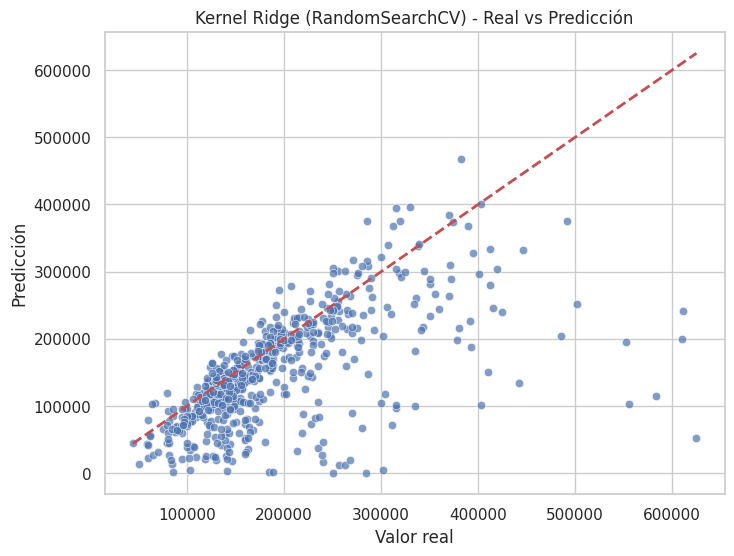

In [40]:
krr_random = RandomizedSearchCV(
    estimator=get_krr_pipeline(),
    param_distributions=param_dist_krr,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
krr_random.fit(X_train, y_train)

best_krr_random = krr_random.best_estimator_
print("🔸 RandomizedSearchCV - Mejores parámetros:", krr_random.best_params_)
evaluate_model(best_krr_random, X_train, y_train, cv)
plot_predictions(best_krr_random, X_train, X_test, y_train, y_test, "Kernel Ridge (RandomSearchCV) - Real vs Predicción")


**Kernel Ridge con BayesSearchCV**

🔶 BayesSearchCV - Mejores parámetros: OrderedDict([('regressor__alpha', 17.76576664980768), ('regressor__gamma', 0.04869521028037488)])
Linear Regression - Resultados promedio (5 folds):
MAE:  72349.80 ± 2383.73
MSE:  11427861232.92 ± 847212033.83
R2:   -0.9242 ± 0.0573
MAPE: 37.00 ± 1.00


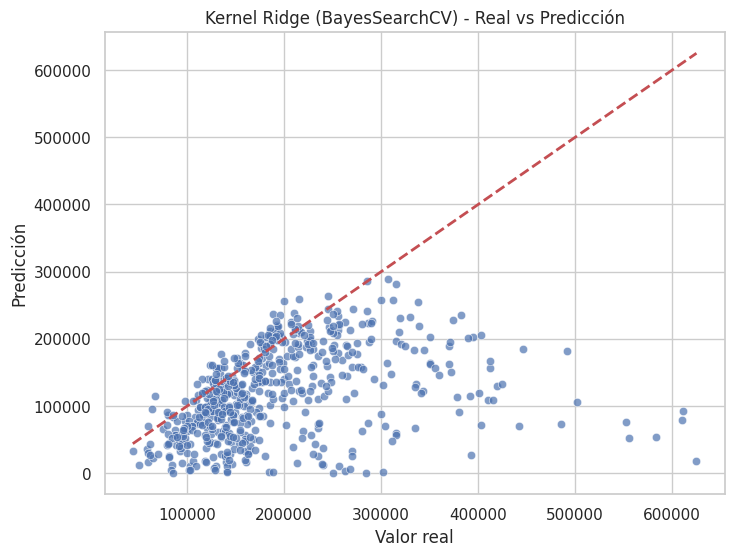

In [41]:
from skopt import BayesSearchCV

krr_bayes = BayesSearchCV(
    estimator=get_krr_pipeline(),
    search_spaces=param_bayes_krr,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
krr_bayes.fit(X_train, y_train)

best_krr_bayes = krr_bayes.best_estimator_
print("🔶 BayesSearchCV - Mejores parámetros:", krr_bayes.best_params_)
evaluate_model(best_krr_bayes, X_train, y_train, cv)
plot_predictions(best_krr_bayes, X_train, X_test, y_train, y_test, "Kernel Ridge (BayesSearchCV) - Real vs Predicción")


# Modelo 5 - SGDRegressor

In [42]:
from sklearn.linear_model import SGDRegressor
from skopt.space import Real, Categorical, Integer

# Pipeline base
def get_sgd_pipeline():
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", SGDRegressor(random_state=42))
    ])

# Espacio de búsqueda para Grid
param_grid_sgd = {
    "regressor__alpha": [1e-4, 1e-3, 1e-2],
    "regressor__penalty": ["l2", "l1", "elasticnet"],
    "regressor__l1_ratio": [0.15, 0.5, 0.85],
    "regressor__learning_rate": ["constant", "invscaling", "adaptive"],
    "regressor__eta0": [0.001, 0.01, 0.1],
    "regressor__max_iter": [1000]
}

# Para Random
param_dist_sgd = {
    "regressor__alpha": np.logspace(-5, -1, 100),
    "regressor__penalty": ["l2", "l1", "elasticnet"],
    "regressor__l1_ratio": np.linspace(0.1, 0.9, 10),
    "regressor__eta0": np.logspace(-4, -1, 50),
    "regressor__learning_rate": ["constant", "invscaling", "adaptive"],
    "regressor__max_iter": [1000]
}

# Para Bayes
param_bayes_sgd = {
    "regressor__alpha": Real(1e-5, 1e-1, prior='log-uniform'),
    "regressor__penalty": Categorical(["l2", "l1", "elasticnet"]),
    "regressor__l1_ratio": Real(0.1, 0.9),
    "regressor__eta0": Real(1e-4, 0.1, prior='log-uniform'),
    "regressor__learning_rate": Categorical(["constant", "invscaling", "adaptive"]),
    "regressor__max_iter": Integer(500, 1500)
}


**SGDRegressor con GridSearchCV**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


🔷 GridSearchCV - Mejores parámetros: {'regressor__alpha': 0.01, 'regressor__eta0': 0.001, 'regressor__l1_ratio': 0.15, 'regressor__learning_rate': 'adaptive', 'regressor__max_iter': 1000, 'regressor__penalty': 'l1'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

Linear Regression - Resultados promedio (5 folds):
MAE:  16691.96 ± 968.74
MSE:  976474089.22 ± 669182238.00
R2:   0.8363 ± 0.1100
MAPE: 10.22 ± 0.66


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


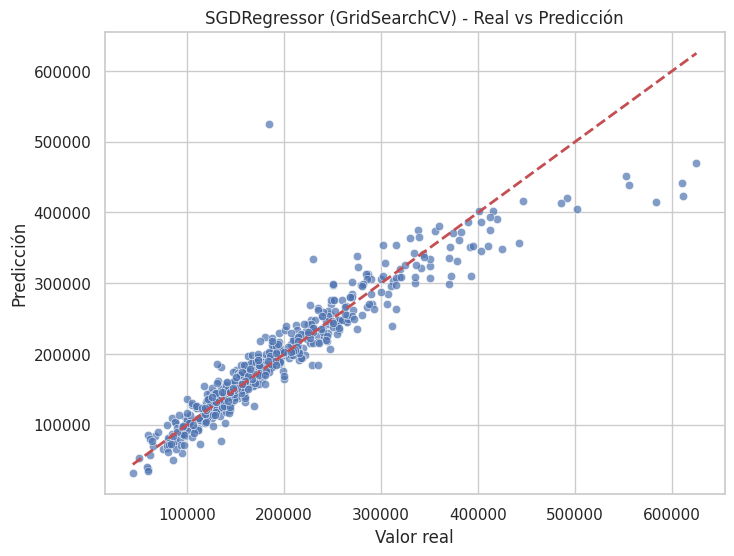

In [43]:
sgd_grid = GridSearchCV(
    estimator=get_sgd_pipeline(),
    param_grid=param_grid_sgd,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
sgd_grid.fit(X_train, y_train)

best_sgd_grid = sgd_grid.best_estimator_
print("🔷 GridSearchCV - Mejores parámetros:", sgd_grid.best_params_)
evaluate_model(best_sgd_grid, X_train, y_train, cv)
plot_predictions(best_sgd_grid, X_train, X_test, y_train, y_test, "SGDRegressor (GridSearchCV) - Real vs Predicción")


**SGDRegressor con RandomizedSearchCV**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


🔸 RandomizedSearchCV - Mejores parámetros: {'regressor__penalty': 'l2', 'regressor__max_iter': 1000, 'regressor__learning_rate': 'adaptive', 'regressor__l1_ratio': np.float64(0.9), 'regressor__eta0': np.float64(0.00339322177189533), 'regressor__alpha': np.float64(0.00016297508346206434)}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

Linear Regression - Resultados promedio (5 folds):
MAE:  16825.24 ± 1000.45
MSE:  963874992.45 ± 635276097.26
R2:   0.8384 ± 0.1044
MAPE: 10.35 ± 0.70


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


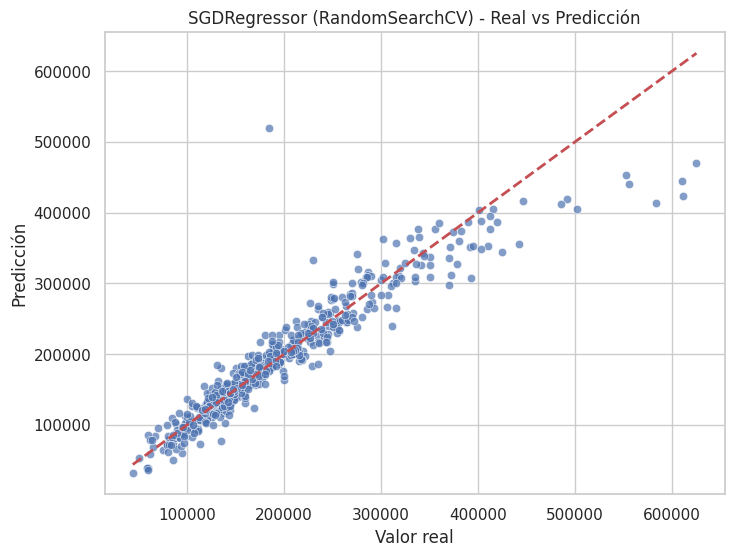

In [44]:
sgd_random = RandomizedSearchCV(
    estimator=get_sgd_pipeline(),
    param_distributions=param_dist_sgd,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
sgd_random.fit(X_train, y_train)

best_sgd_random = sgd_random.best_estimator_
print("🔸 RandomizedSearchCV - Mejores parámetros:", sgd_random.best_params_)
evaluate_model(best_sgd_random, X_train, y_train, cv)
plot_predictions(best_sgd_random, X_train, X_test, y_train, y_test, "SGDRegressor (RandomSearchCV) - Real vs Predicción")


**SGDRegressor con BayesSearchCV**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


🔶 BayesSearchCV - Mejores parámetros: OrderedDict([('regressor__alpha', 0.015783879853890563), ('regressor__eta0', 0.002061045404501547), ('regressor__l1_ratio', 0.521296189702154), ('regressor__learning_rate', 'adaptive'), ('regressor__max_iter', 1404), ('regressor__penalty', 'elasticnet')])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Linear Regression - Resultados promedio (5 folds):
MAE:  16624.70 ± 979.03
MSE:  974966273.25 ± 668819175.83
R2:   0.8365 ± 0.1100
MAPE: 10.15 ± 0.66


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


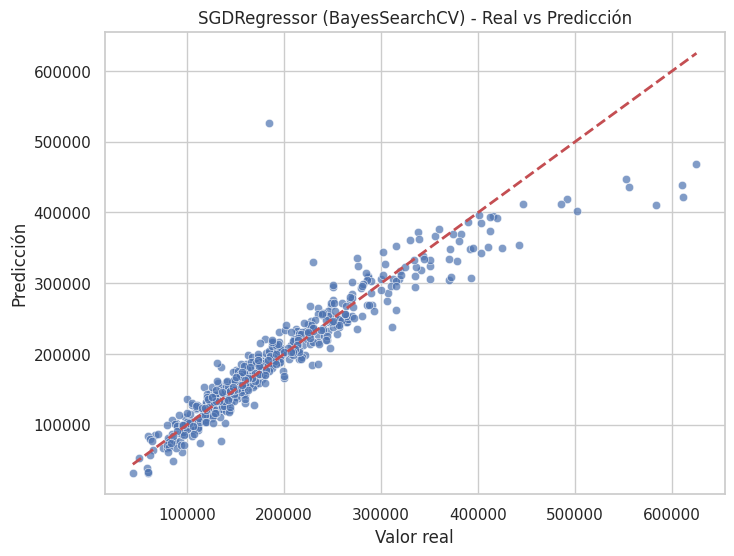

In [45]:
from skopt import BayesSearchCV

sgd_bayes = BayesSearchCV(
    estimator=get_sgd_pipeline(),
    search_spaces=param_bayes_sgd,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
sgd_bayes.fit(X_train, y_train)

best_sgd_bayes = sgd_bayes.best_estimator_
print("🔶 BayesSearchCV - Mejores parámetros:", sgd_bayes.best_params_)
evaluate_model(best_sgd_bayes, X_train, y_train, cv)
plot_predictions(best_sgd_bayes, X_train, X_test, y_train, y_test, "SGDRegressor (BayesSearchCV) - Real vs Predicción")


# Modelo 6 - BayesianRidge

In [46]:
from sklearn.linear_model import BayesianRidge
from skopt.space import Real

# Definimos el pipeline base
def get_bayes_ridge_pipeline():
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", BayesianRidge())
    ])

# Espacio para GridSearch
param_grid_bayesridge = {
    "regressor__alpha_1": [1e-6, 1e-5, 1e-4],
    "regressor__alpha_2": [1e-6, 1e-5, 1e-4],
    "regressor__lambda_1": [1e-6, 1e-5, 1e-4],
    "regressor__lambda_2": [1e-6, 1e-5, 1e-4],
    "regressor__tol": [1e-4, 1e-3, 1e-2]
}

# Espacio para RandomSearch
param_dist_bayesridge = {
    "regressor__alpha_1": np.logspace(-6, -3, 100),
    "regressor__alpha_2": np.logspace(-6, -3, 100),
    "regressor__lambda_1": np.logspace(-6, -3, 100),
    "regressor__lambda_2": np.logspace(-6, -3, 100),
    "regressor__tol": np.logspace(-4, -2, 100)
}

# Espacio para BayesSearch
param_bayes_bayesridge = {
    "regressor__alpha_1": Real(1e-6, 1e-3, prior='log-uniform'),
    "regressor__alpha_2": Real(1e-6, 1e-3, prior='log-uniform'),
    "regressor__lambda_1": Real(1e-6, 1e-3, prior='log-uniform'),
    "regressor__lambda_2": Real(1e-6, 1e-3, prior='log-uniform'),
    "regressor__tol": Real(1e-4, 1e-2, prior='log-uniform')
}


**Bayesian Ridge con GridSearchCV**

In [47]:
bayesridge_grid = GridSearchCV(
    estimator=get_bayes_ridge_pipeline(),
    param_grid=param_grid_bayesridge,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
bayesridge_grid.fit(X_train, y_train)

best_bayesridge_grid = bayesridge_grid.best_estimator_
print("🔷 GridSearchCV - Mejores parámetros:", bayesridge_grid.best_params_)
evaluate_model(best_bayesridge_grid, X_train, y_train, cv)
plot_predictions(best_bayesridge_grid, X_train, X_test, y_train, y_test, "Bayesian Ridge (GridSearchCV)")


ValueError: 
All the 1215 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_bayes.py", line 238, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1014, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 613, in _ensure_sparse_format
    raise TypeError(
TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.


**Bayesian Ridge con RandomizedSearchCV**

In [ ]:
bayesridge_random = RandomizedSearchCV(
    estimator=get_bayes_ridge_pipeline(),
    param_distributions=param_dist_bayesridge,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
bayesridge_random.fit(X_train, y_train)

best_bayesridge_random = bayesridge_random.best_estimator_
print("🔸 RandomizedSearchCV - Mejores parámetros:", bayesridge_random.best_params_)
evaluate_model(best_bayesridge_random, X_train, y_train, cv)
plot_predictions(best_bayesridge_random, X_train, X_test, y_train, y_test, "Bayesian Ridge (RandomSearchCV)")


**Bayesian Ridge con BayesSearchCV**

In [ ]:
from skopt import BayesSearchCV

bayesridge_bayes = BayesSearchCV(
    estimator=get_bayes_ridge_pipeline(),
    search_spaces=param_bayes_bayesridge,
    n_iter=20,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
bayesridge_bayes.fit(X_train, y_train)

best_bayesridge_bayes = bayesridge_bayes.best_estimator_
print("🔶 BayesSearchCV - Mejores parámetros:", bayesridge_bayes.best_params_)
evaluate_model(best_bayesridge_bayes, X_train, y_train, cv)
plot_predictions(best_bayesridge_bayes, X_train, X_test, y_train, y_test, "Bayesian Ridge (BayesSearchCV)")


# Modelo 7 - Gaussian Process Regressor

In [50]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel
from skopt.space import Real

# Pipeline base
def get_gpr_pipeline(kernel):
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", GaussianProcessRegressor(kernel=kernel, normalize_y=True, random_state=42))
    ])

# Definimos un kernel base (se usará como punto de partida)
kernel_base = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 1e1))

# Espacio para búsqueda bayesiana
param_bayes_gpr = {
    "regressor__alpha": Real(1e-10, 1e-1, prior='log-uniform')
}


**Gaussian Process con GridSearchCV**

🔷 GridSearchCV - Mejores parámetros: {'regressor__alpha': 1e-10}
Linear Regression - Resultados promedio (5 folds):
MAE:  13809.59 ± 985.48
MSE:  617865892.01 ± 320539826.69
R2:   0.8964 ± 0.0525
MAPE: 8.55 ± 0.84


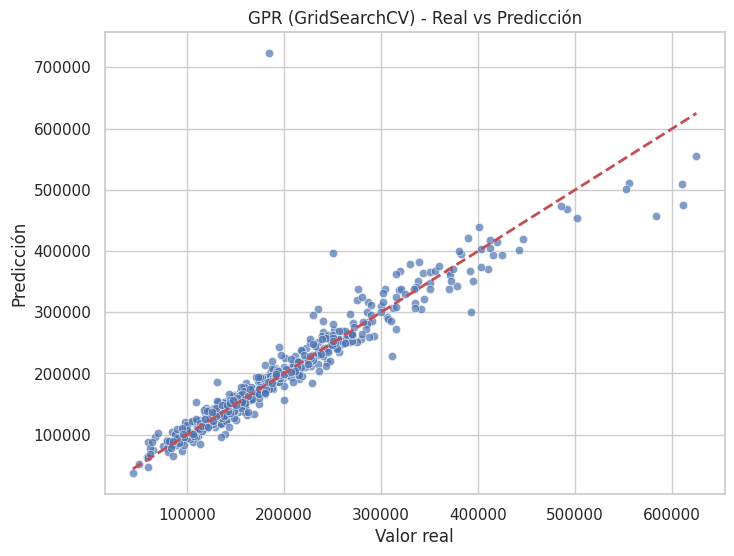

In [51]:
param_grid_gpr = {
    "regressor__alpha": [1e-10, 1e-5, 1e-2]
}

gpr_grid = GridSearchCV(
    estimator=get_gpr_pipeline(kernel_base),
    param_grid=param_grid_gpr,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
gpr_grid.fit(X_train, y_train)

best_gpr_grid = gpr_grid.best_estimator_
print("🔷 GridSearchCV - Mejores parámetros:", gpr_grid.best_params_)
evaluate_model(best_gpr_grid, X_train, y_train, cv)
plot_predictions(best_gpr_grid, X_train, X_test, y_train, y_test, "GPR (GridSearchCV) - Real vs Predicción")


**Gaussian Process con RandomizedSearchCV**

🔸 RandomizedSearchCV - Mejores parámetros: {'regressor__alpha': np.float64(1e-08)}
Linear Regression - Resultados promedio (5 folds):
MAE:  13809.59 ± 985.48
MSE:  617865815.54 ± 320539676.13
R2:   0.8964 ± 0.0525
MAPE: 8.55 ± 0.84


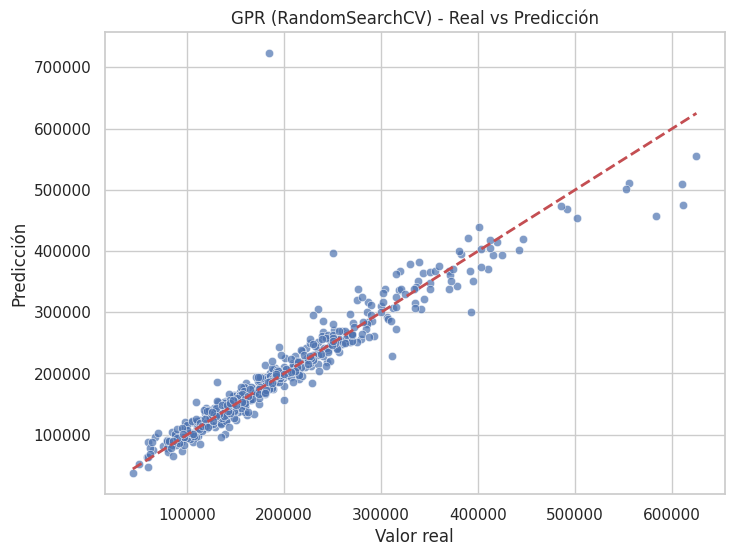

In [53]:
param_dist_gpr = {
    "regressor__alpha": np.logspace(-10, -1, 100)
}

gpr_random = RandomizedSearchCV(
    estimator=get_gpr_pipeline(kernel_base),
    param_distributions=param_dist_gpr,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
gpr_random.fit(X_train, y_train)

best_gpr_random = gpr_random.best_estimator_
print("🔸 RandomizedSearchCV - Mejores parámetros:", gpr_random.best_params_)
evaluate_model(best_gpr_random, X_train, y_train, cv)
plot_predictions(best_gpr_random, X_train, X_test, y_train, y_test, "GPR (RandomSearchCV) - Real vs Predicción")


**Gaussian Process con BayesSearchCV**

In [ ]:
gpr_bayes = BayesSearchCV(
    estimator=get_gpr_pipeline(kernel_base),
    search_spaces=param_bayes_gpr,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
gpr_bayes.fit(X_train, y_train)

best_gpr_bayes = gpr_bayes.best_estimator_
print("🔶 BayesSearchCV - Mejores parámetros:", gpr_bayes.best_params_)
evaluate_model(best_gpr_bayes, X_train, y_train, cv)
plot_predictions(best_gpr_bayes, X_train, X_test, y_train, y_test, "GPR (BayesSearchCV) - Real vs Predicción")


# Modelo 8 - RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Pipeline base
def get_rf_pipeline():
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(random_state=42))
    ])


**GridSearchCV para Random Forest**

In [ ]:
param_grid_rf = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [None, 10, 20],
    "regressor__min_samples_split": [2, 5],
    "regressor__min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(
    estimator=get_rf_pipeline(),
    param_grid=param_grid_rf,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

best_rf_grid = rf_grid.best_estimator_
print("🔷 GridSearchCV - Mejores parámetros:", rf_grid.best_params_)
evaluate_model(best_rf_grid, X_train, y_train, cv)
plot_predictions(best_rf_grid, X_train, X_test, y_train, y_test, "Random Forest (GridSearchCV)")


**RandomizedSearchCV para Random Forest**

In [ ]:
param_dist_rf = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [None, 10, 20, 30],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=get_rf_pipeline(),
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

best_rf_random = rf_random.best_estimator_
print("🔸 RandomizedSearchCV - Mejores parámetros:", rf_random.best_params_)
evaluate_model(best_rf_random, X_train, y_train, cv)
plot_predictions(best_rf_random, X_train, X_test, y_train, y_test, "Random Forest (RandomizedSearchCV)")


**BayesSearchCV para Random Forest**

In [ ]:
from skopt.space import Integer
from skopt import BayesSearchCV

param_bayes_rf = {
    "regressor__n_estimators": Integer(100, 300),
    "regressor__max_depth": Integer(5, 30),
    "regressor__min_samples_split": Integer(2, 10),
    "regressor__min_samples_leaf": Integer(1, 5)
}

rf_bayes = BayesSearchCV(
    estimator=get_rf_pipeline(),
    search_spaces=param_bayes_rf,
    n_iter=15,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
rf_bayes.fit(X_train, y_train)

best_rf_bayes = rf_bayes.best_estimator_
print("🔶 BayesSearchCV - Mejores parámetros:", rf_bayes.best_params_)
evaluate_model(best_rf_bayes, X_train, y_train, cv)
plot_predictions(best_rf_bayes, X_train, X_test, y_train, y_test, "Random Forest (BayesSearchCV)")


# Modelo 9 - Support Vector Machines Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# Pipeline base
def get_svr_pipeline():
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", SVR())
    ])


**GridSearchCV para SVR**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_svr = {
    "regressor__kernel": ["rbf"],
    "regressor__C": [0.1, 1, 10],
    "regressor__epsilon": [0.01, 0.1, 0.2],
    "regressor__gamma": ["scale", "auto"]
}

svr_grid = GridSearchCV(
    estimator=get_svr_pipeline(),
    param_grid=param_grid_svr,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)
svr_grid.fit(X_train, y_train)

best_svr_grid = svr_grid.best_estimator_
print("🔷 GridSearchCV - Mejores parámetros:", svr_grid.best_params_)
evaluate_model(best_svr_grid, X_train, y_train, cv)
plot_predictions(best_svr_grid, X_train, X_test, y_train, y_test, "SVR (GridSearchCV)")


**RandomizedSearchCV para SVR**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

param_dist_svr = {
    "regressor__kernel": ["rbf"],
    "regressor__C": stats.loguniform(0.1, 100),
    "regressor__epsilon": stats.uniform(0.01, 0.3),
    "regressor__gamma": ["scale", "auto"]
}

svr_random = RandomizedSearchCV(
    estimator=get_svr_pipeline(),
    param_distributions=param_dist_svr,
    n_iter=15,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
svr_random.fit(X_train, y_train)

best_svr_random = svr_random.best_estimator_
print("🔸 RandomizedSearchCV - Mejores parámetros:", svr_random.best_params_)
evaluate_model(best_svr_random, X_train, y_train, cv)
plot_predictions(best_svr_random, X_train, X_test, y_train, y_test, "SVR (RandomizedSearchCV)")


**BayesSearchCV para SVR**

In [ ]:
from skopt.space import Real, Categorical
from skopt import BayesSearchCV

param_bayes_svr = {
    "regressor__kernel": Categorical(["rbf"]),
    "regressor__C": Real(0.1, 100, prior="log-uniform"),
    "regressor__epsilon": Real(0.01, 0.3),
    "regressor__gamma": Categorical(["scale", "auto"])
}

svr_bayes = BayesSearchCV(
    estimator=get_svr_pipeline(),
    search_spaces=param_bayes_svr,
    n_iter=15,
    cv=cv,
    scoring="neg_mean_squared_error",
    random_state=42,
    n_jobs=-1
)
svr_bayes.fit(X_train, y_train)

best_svr_bayes = svr_bayes.best_estimator_
print("🔶 BayesSearchCV - Mejores parámetros:", svr_bayes.best_params_)
evaluate_model(best_svr_bayes, X_train, y_train, cv)
plot_predictions(best_svr_bayes, X_train, X_test, y_train, y_test, "SVR (BayesSearchCV)")


# Calcular RMSE de cada modelo optimizado

In [ ]:
# Función para calcular RMSE con validación cruzada
def get_rmse(model, X, y, cv):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)
    rmse = np.sqrt(-scores.mean())
    return rmse

# Diccionario de modelos organizados por grupo
model_groups = {
    "Lasso": {
        "Lasso GridSearchCV": best_lasso_grid,
        "Lasso RandomizedSearchCV": best_lasso_random,
        "Lasso BayesSearchCV": best_lasso_bayes
    },
    "ElasticNet": {
        "ElasticNet GridSearchCV": best_elastic_grid,
        "ElasticNet RandomizedSearchCV": best_elastic_random,
        "ElasticNet BayesSearchCV": best_elastic_bayes
    },
    "Kernel Ridge": {
        "KRR GridSearchCV": best_krr_grid,
        "KRR RandomizedSearchCV": best_krr_random,
        "KRR BayesSearchCV": best_krr_bayes
    },
    "SGD": {
        "SGD GridSearchCV": best_sgd_grid,
        "SGD RandomizedSearchCV": best_sgd_random,
        "SGD BayesSearchCV": best_sgd_bayes
    },
    "Gaussian Process": {
        "GPR GridSearchCV": best_gpr_grid,
        "GPR RandomizedSearchCV": best_gpr_random,
        "GPR BayesSearchCV": best_gpr_bayes
    },
    "Random Forest": {
        "RF GridSearchCV": best_rf_grid,
        "RF RandomizedSearchCV": best_rf_random,
        "RF BayesSearchCV": best_rf_bayes
    },
    "SVR": {
        "SVR GridSearchCV": best_svr_grid,
        "SVR RandomizedSearchCV": best_svr_random,
        "SVR BayesSearchCV": best_svr_bayes
    }
}

# Calcular RMSE para todos los modelos
rmse_by_group = {}
for group, models in model_groups.items():
    rmse_by_group[group] = {name: get_rmse(model, X_train, y_train, cv) for name, model in models.items()}


**Grafica de cada grupo por separado**

In [ ]:
# Función para graficar barras
def plot_group_comparison(group_name, rmse_dict):
    plt.figure(figsize=(8, 5))
    names = list(rmse_dict.keys())
    scores = list(rmse_dict.values())
    plt.bar(names, scores, color="skyblue")
    plt.ylabel("RMSE (Cross-Validated)")
    plt.title(f"Comparación de {group_name}")
    plt.xticks(rotation=30, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Graficar cada grupo
for group_name, rmse_dict in rmse_by_group.items():
    plot_group_comparison(group_name, rmse_dict)


**Comparación general entre todos los modelos**

In [ ]:
# Combinar todos los RMSE en un solo diccionario
all_rmse = {}
for group in rmse_by_group:
    all_rmse.update(rmse_by_group[group])

# Ordenar por rendimiento (menor RMSE es mejor)
all_rmse_sorted = dict(sorted(all_rmse.items(), key=lambda x: x[1]))

# Graficar comparación general
plt.figure(figsize=(12, 8))
names = list(all_rmse_sorted.keys())
scores = list(all_rmse_sorted.values())
bars = plt.barh(names, scores, color="cornflowerblue")
plt.xlabel("RMSE (Cross-Validated)")
plt.title("Comparación General de Todos los Modelos Optimización")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
